# 機械学習スクラッチ ロジスティック回帰

参考サイト：<br>
決定領域のプロット方法<br>
https://enjoyworks.jp/tech-blog/3087<br>
ラムダのパラメータ設定基準<br>
https://jp.mathworks.com/help/stats/regularize-logistic-regression.html<br>
ラベルが0, 1以外で入った時の対処法
https://note.nkmk.me/python-pass-usage/<br>
https://python.atelierkobato.com/where/<br>

In [ ]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            else:
                y_hat[i] = 0
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題1】仮定関数

In [ ]:
# シグモイド関数、仮定関数の定義
def sigmoid(self, x):
    return 1 / (1 + np.exp(x))

def _linear_hypothis(self, X):
    return np.dot(X, self.theta)

【問題2】最急降下法

In [ ]:
def _gradient_descent(self, X, y):
    x = self._linearhypothis(X)
    pred = self.sigmoid(x)
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    self.theta[0] = met_sum[0] / X.shape[0]
    for j in range(1, X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])\
        + (self.lmd * self.theta[j] / X.shape[0])

【問題3】推定

上で実装済み

【問題4】目的関数

In [ ]:
def target_function(self, X, y, y_hat):
    return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m)\
            + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題5】学習と推定

In [3]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=3000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        self.val_loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # ラベル変換
        if list(set(np.unique(y)) - set([0, 1])) == []:
            self.base_label = None
            pass
        
        else:
            self.base_label = np.unique(y)
            np.place(y, y == self.base_label[0], 0)
            np.place(y, y == self.base_label[1], 1)
        
        # パラメータ初期値設定, バイアス項ONOFF
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        # トレーニング開始
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
        # バリデーション
        if type(y_val) == bool:
            if list(set(np.unique(y_val)) - set([0, 1])) == []:
                self.val_base_label = None
                pass
        
            else:
                self.val_base_label = np.unique(y_val)
                np.place(y_val, y_val == self.val_base_label[0], 0)
                np.place(y_val, y_val == self.val_base_label[1], 1)
                
            self.val_theta = np.random.rand(X_val.shape[1], 1)
            if self.bias:
                theta_bias = np.ones((1,1))
                self.theta = np.insert(self.val_theta, 0, theta_bias)
                X_val = np.insert(X_val, 0, 1, axis=1)
                
            for i in range(self.iter):
                x = self._linear_hypothis(X_val)
                val_y_hat = self.sigmoid(x)
                self.val_loss = self.target_function(X_val, y_val, val_y_hat)
                self._gradient_descent(X_val, y_val, val_y_hat)
                self.val_loss_list.append(self.val_loss)

                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.val_loss))
                    
        else:
            pass
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        # バイアスONOFF
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
#         print(y_hat)
        # 閾値による確率のラベル化
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            elif y_hat[i] <= 0.5:
                y_hat[i] = 0
        # fit時に変換したラベルを元に戻す
        if self.base_label.all() == None:
            pass
        else:
            y_hat = np.where(y_hat * 1 == 0, self.base_label[0], self.base_label[1])
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        # 確率をそのまま返す
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項パラメータの処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外のパラメータ処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
iris_data = iris.data[50:, :]
iris_target = iris.target[50:]

In [5]:
iris_data.shape

(100, 4)

In [6]:
iris_target.shape

(100,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2)

In [8]:
SLR = ScratchLogisticRegression(bias=True, verbose=True)
# SLR.fit(X_train, y_train, X_test, y_test)
SLR.fit(X_train, y_train)
pred = SLR.predict(X_test)
pred_proba = SLR.predict_proba(X_test)
print('予測ラベル: \n', pred)
print('予測確率: \n', pred_proba)

1 / 3000 times done | loss value: 4.732568559543217
2 / 3000 times done | loss value: 4.73109998931572
3 / 3000 times done | loss value: 4.729631420948019
4 / 3000 times done | loss value: 4.7281628544423615
5 / 3000 times done | loss value: 4.726694289800596
6 / 3000 times done | loss value: 4.725225727025557
7 / 3000 times done | loss value: 4.723757166118624
8 / 3000 times done | loss value: 4.722288607082474
9 / 3000 times done | loss value: 4.720820049918435
10 / 3000 times done | loss value: 4.719351494629764
11 / 3000 times done | loss value: 4.717882941217688
12 / 3000 times done | loss value: 4.716414389685067
13 / 3000 times done | loss value: 4.714945840033169
14 / 3000 times done | loss value: 4.713477292264891
15 / 3000 times done | loss value: 4.712008746382064
16 / 3000 times done | loss value: 4.710540202387259
17 / 3000 times done | loss value: 4.709071660282398
18 / 3000 times done | loss value: 4.707603120069299
19 / 3000 times done | loss value: 4.706134581750763
20

572 / 3000 times done | loss value: 3.894424741669908
573 / 3000 times done | loss value: 3.8929579071743245
574 / 3000 times done | loss value: 3.8914910778309046
575 / 3000 times done | loss value: 3.8900242536517906
576 / 3000 times done | loss value: 3.8885574346495595
577 / 3000 times done | loss value: 3.8870906208366667
578 / 3000 times done | loss value: 3.885623812225449
579 / 3000 times done | loss value: 3.8841570088285646
580 / 3000 times done | loss value: 3.882690210658453
581 / 3000 times done | loss value: 3.8812234177278246
582 / 3000 times done | loss value: 3.879756630049315
583 / 3000 times done | loss value: 3.8782898476355103
584 / 3000 times done | loss value: 3.876823070499109
585 / 3000 times done | loss value: 3.875356298653031
586 / 3000 times done | loss value: 3.873889532109975
587 / 3000 times done | loss value: 3.8724227708827734
588 / 3000 times done | loss value: 3.8709560149843507
589 / 3000 times done | loss value: 3.869489264427569
590 / 3000 times d

1092 / 3000 times done | loss value: 3.1328224516021606
1093 / 3000 times done | loss value: 3.1313614011672093
1094 / 3000 times done | loss value: 3.1299003720933305
1095 / 3000 times done | loss value: 3.1284393644439836
1096 / 3000 times done | loss value: 3.1269783782828253
1097 / 3000 times done | loss value: 3.1255174136737307
1098 / 3000 times done | loss value: 3.124056470680729
1099 / 3000 times done | loss value: 3.1225955493681363
1100 / 3000 times done | loss value: 3.121134649800372
1101 / 3000 times done | loss value: 3.1196737720421175
1102 / 3000 times done | loss value: 3.1182129161582712
1103 / 3000 times done | loss value: 3.1167520822138783
1104 / 3000 times done | loss value: 3.115291270274252
1105 / 3000 times done | loss value: 3.113830480404859
1106 / 3000 times done | loss value: 3.1123697126714
1107 / 3000 times done | loss value: 3.1109089671397814
1108 / 3000 times done | loss value: 3.109448243876124
1109 / 3000 times done | loss value: 3.107987542946736
1

1442 / 3000 times done | loss value: 2.6233640911099108
1443 / 3000 times done | loss value: 2.621916292613374
1444 / 3000 times done | loss value: 2.6204685558000254
1445 / 3000 times done | loss value: 2.619020880859219
1446 / 3000 times done | loss value: 2.6175732679809043
1447 / 3000 times done | loss value: 2.616125717355602
1448 / 3000 times done | loss value: 2.6146782291744297
1449 / 3000 times done | loss value: 2.6132308036290923
1450 / 3000 times done | loss value: 2.611783440911876
1451 / 3000 times done | loss value: 2.6103361412156785
1452 / 3000 times done | loss value: 2.60888890473398
1453 / 3000 times done | loss value: 2.607441731660861
1454 / 3000 times done | loss value: 2.605994622190993
1455 / 3000 times done | loss value: 2.604547576519648
1456 / 3000 times done | loss value: 2.6031005948427133
1457 / 3000 times done | loss value: 2.601653677356665
1458 / 3000 times done | loss value: 2.6002068242585863
1459 / 3000 times done | loss value: 2.598760035746176
146

1928 / 3000 times done | loss value: 1.9324138986810817
1929 / 3000 times done | loss value: 1.9310345502904152
1930 / 3000 times done | loss value: 1.9296554685291665
1931 / 3000 times done | loss value: 1.9282766541656122
1932 / 3000 times done | loss value: 1.926898107969977
1933 / 3000 times done | loss value: 1.925519830714436
1934 / 3000 times done | loss value: 1.9241418231731204
1935 / 3000 times done | loss value: 1.92276408612212
1936 / 3000 times done | loss value: 1.9213866203394814
1937 / 3000 times done | loss value: 1.9200094266052166
1938 / 3000 times done | loss value: 1.9186325057013085
1939 / 3000 times done | loss value: 1.9172558584117017
1940 / 3000 times done | loss value: 1.9158794855223213
1941 / 3000 times done | loss value: 1.9145033878210649
1942 / 3000 times done | loss value: 1.9131275660978102
1943 / 3000 times done | loss value: 1.9117520211444172
1944 / 3000 times done | loss value: 1.9103767537547311
1945 / 3000 times done | loss value: 1.9090017647245

2120 / 3000 times done | loss value: 1.6734728095214846
2121 / 3000 times done | loss value: 1.672161152878033
2122 / 3000 times done | loss value: 1.6708499490842745
2123 / 3000 times done | loss value: 1.6695391993245958
2124 / 3000 times done | loss value: 1.6682289047856425
2125 / 3000 times done | loss value: 1.6669190666563223
2126 / 3000 times done | loss value: 1.6656096861277998
2127 / 3000 times done | loss value: 1.6643007643934995
2128 / 3000 times done | loss value: 1.6629923026491018
2129 / 3000 times done | loss value: 1.6616843020925434
2130 / 3000 times done | loss value: 1.6603767639240172
2131 / 3000 times done | loss value: 1.6590696893459673
2132 / 3000 times done | loss value: 1.657763079563091
2133 / 3000 times done | loss value: 1.6564569357823387
2134 / 3000 times done | loss value: 1.655151259212909
2135 / 3000 times done | loss value: 1.6538460510662492
2136 / 3000 times done | loss value: 1.652541312556055
2137 / 3000 times done | loss value: 1.6512370448982

2490 / 3000 times done | loss value: 1.230504793259994
2491 / 3000 times done | loss value: 1.2294568465855864
2492 / 3000 times done | loss value: 1.2284098960459515
2493 / 3000 times done | loss value: 1.227363943123104
2494 / 3000 times done | loss value: 1.226318989296883
2495 / 3000 times done | loss value: 1.2252750360449256
2496 / 3000 times done | loss value: 1.2242320848426465
2497 / 3000 times done | loss value: 1.2231901371632101
2498 / 3000 times done | loss value: 1.2221491944775131
2499 / 3000 times done | loss value: 1.221109258254154
2500 / 3000 times done | loss value: 1.220070329959415
2501 / 3000 times done | loss value: 1.2190324110572346
2502 / 3000 times done | loss value: 1.2179955030091854
2503 / 3000 times done | loss value: 1.2169596072744513
2504 / 3000 times done | loss value: 1.215924725309802
2505 / 3000 times done | loss value: 1.21489085856957
2506 / 3000 times done | loss value: 1.2138580085056256
2507 / 3000 times done | loss value: 1.2128261765673563


2642 / 3000 times done | loss value: 1.0834372549498743
2643 / 3000 times done | loss value: 1.0825559677908168
2644 / 3000 times done | loss value: 1.0816758633427286
2645 / 3000 times done | loss value: 1.0807969424845536
2646 / 3000 times done | loss value: 1.0799192060895535
2647 / 3000 times done | loss value: 1.079042655025292
2648 / 3000 times done | loss value: 1.078167290153615
2649 / 3000 times done | loss value: 1.0772931123306282
2650 / 3000 times done | loss value: 1.0764201224066838
2651 / 3000 times done | loss value: 1.075548321226356
2652 / 3000 times done | loss value: 1.0746777096284243
2653 / 3000 times done | loss value: 1.0738082884458564
2654 / 3000 times done | loss value: 1.072940058505786
2655 / 3000 times done | loss value: 1.0720730206294977
2656 / 3000 times done | loss value: 1.0712071756324058
2657 / 3000 times done | loss value: 1.070342524324037
2658 / 3000 times done | loss value: 1.069479067508013
2659 / 3000 times done | loss value: 1.068616805982031

In [9]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 40.0%
適合率: 0.0%
再現率: 0.0%
F値: 0.0


/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


【問題6】学習曲線のプロット

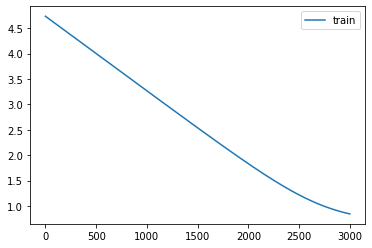

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(3000), SLR.loss_list, label='train')
# plt.plot(range(3000), SLR.val_loss_list, label='val')
plt.legend()
plt.show()

In [119]:
SLR.theta

array([ 0.82977166, -0.30949994,  0.00995669,  0.23072657,  0.01314262])

【問題7】決定領域の可視化

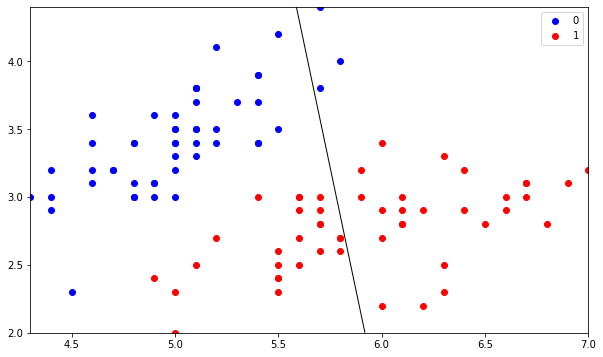

In [482]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data[iris_target == 0][:, 0], iris_data[iris_target == 0][:, 1], color='b', label='0')
plt.scatter(iris_data[iris_target == 1][:, 0], iris_data[iris_target == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = iris_data[:,0].min(), iris_data[:,0].max(),
x2_min, x2_max = iris_data[:,1].min(), iris_data[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = SLR.predict_proba(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

【問題8】（アドバンス課題）重みの保存

In [15]:
import pickle

# テキストモードで保存
with open('weight.pickle', 'wb') as f:
    pickle.dump(SLR.theta, f)

In [16]:
# ファイル読み込み
with open('weight.pickle', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]


In [17]:
# np.saveで保存
np.save('np_save', SLR.theta)

In [18]:
# np.loadで読み込み
print(np.load('np_save.npy'))
print(type(np.load('np_save.npy')))

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]
<class 'numpy.ndarray'>
